# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [4]:
# Check class distribution
class_counts = df["Electric Vehicle Type"].value_counts()
class_counts

Electric Vehicle Type
Battery Electric Vehicle (BEV)            184054
Plug-in Hybrid Electric Vehicle (PHEV)     48176
Name: count, dtype: int64

In [5]:
df.shape

(232230, 16)

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,232226.000000,232230.000000,232203.000000,232203.000000,231749.000000,2.322300e+05,2.322260e+05
mean,98180.172044,2021.353727,46.755998,803.808973,28.880979,2.343671e+08,5.298177e+10
std,2489.407943,2.994884,84.373596,7246.597102,14.904503,6.831418e+07,1.507814e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,0.000000,42.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        27
Base MSRP                                             27
Legislative District                                 481
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.size

3707440

# Exploratory Data Analysis (EDA)

## Electric Vehicle Type Distribution

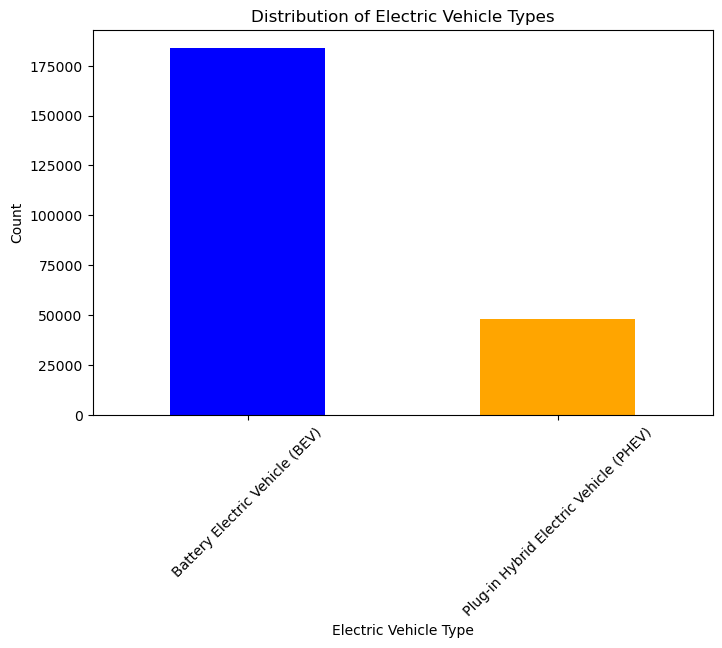

Electric Vehicle Type
Battery Electric Vehicle (BEV)            183706
Plug-in Hybrid Electric Vehicle (PHEV)     48009
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt

# Check class distribution
class_counts = df["Electric Vehicle Type"].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Display class counts
class_counts


* BEVs are more common – Most electric vehicles in the dataset are Battery Electric Vehicles (BEVs).
* Fewer PHEVs – There are fewer Plug-in Hybrid Electric Vehicles (PHEVs) compared to BEVs.
* Future trends – BEVs are likely to grow as more companies focus on fully electric cars.

## Top 10 Car Brands

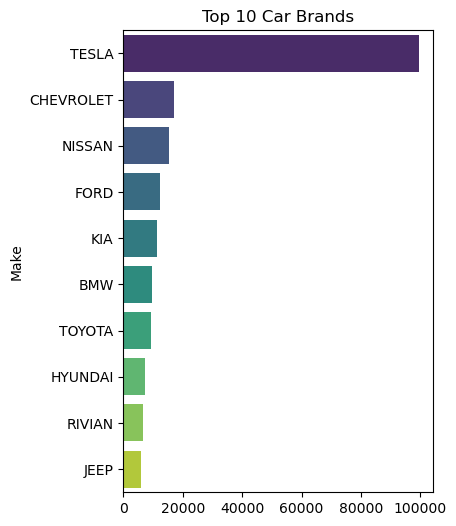

In [17]:
#Top 10 Car Brands
plt.figure(figsize=(28,6))
plt.subplot(1,6,4)
top_makes = df["Make"].value_counts().nlargest(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette="viridis")
plt.title("Top 10 Car Brands")
plt.show()

* Tesla dominates the EV market.
*  Chevrolet, Nissan, Ford follow behind.
* Kia, BMW, Toyota, Hyundai have smaller shares.
* Rivian & Jeep are emerging players.
* EV market is expanding – More brands are entering, increasing competition

## Electric Vehicle Model Year Distribution

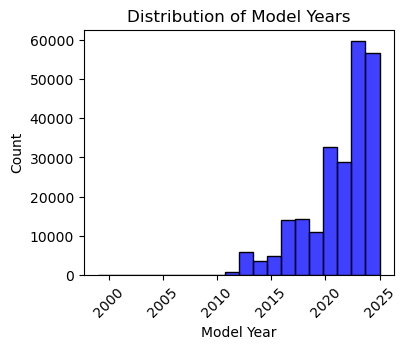

In [20]:
#Distribution of Model Years
plt.figure(figsize=(28,7))  # Increase figure size
plt.subplot(2, 6, 3)  
sns.histplot(df["Model Year"], bins=20, color="blue")  
plt.title("Distribution of Model Years")  
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* EV production is increasing – More models are being released in recent years.
* Sharp rise after 2015 – EV adoption has grown significantly.
* Peak in 2023-2024 – The highest number of EVs are from these years.
* Future trend – EV production is expected to keep growing.

## Count of Vehicles per County 

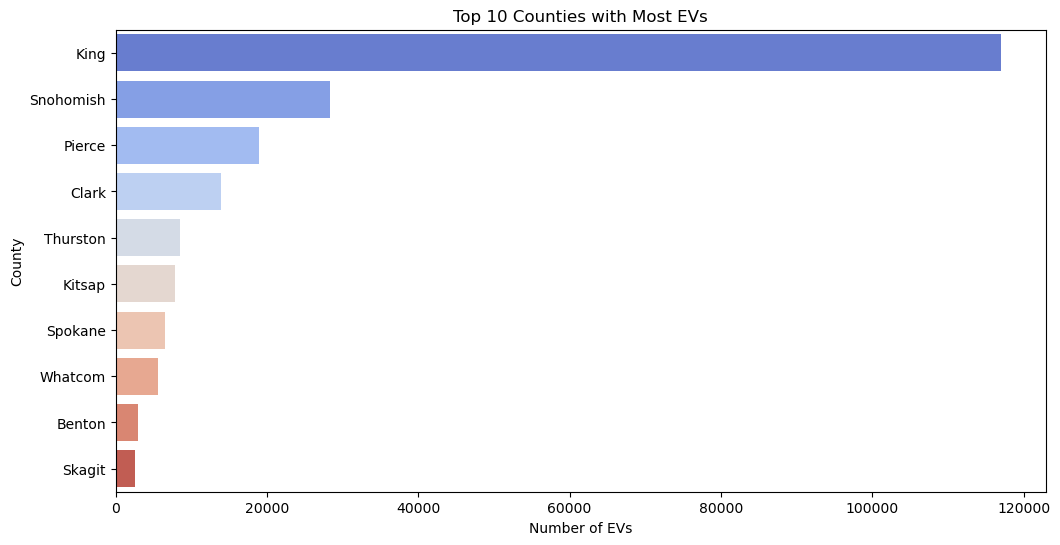

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Set figure size

top_counties = df["County"].value_counts().nlargest(10)  # Get top 10 counties

sns.barplot(y=top_counties.index, x=top_counties.values, palette="coolwarm")  
plt.title("Top 10 Counties with Most EVs")  
plt.xlabel("Number of EVs")  
plt.ylabel("County")  
plt.show()  # Show the plot

* King County leads – It has the highest number of EVs.
* Snohomish & Pierce follow – These countries also have a significant number of EVs.
* Urban areas dominate – Counties with large populations tend to have more EVs.
* Growing EV adoption – More counties are showing increased EV usage.

# Top 10 Legislative Districts with Most EVs

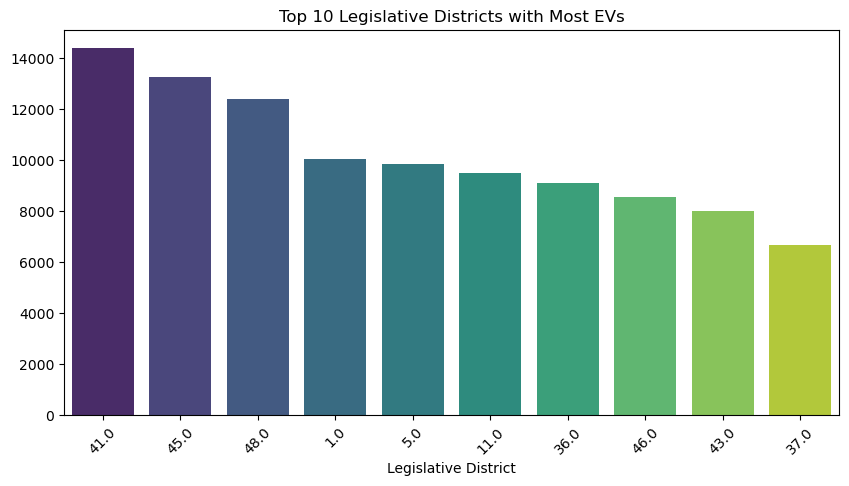

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

top_legislative = df["Legislative District"].value_counts().nlargest(10)
sns.barplot(x=top_legislative.index.astype(str), y=top_legislative.values, palette="viridis", ax=ax)
ax.set_title("Top 10 Legislative Districts with Most EVs")
ax.tick_params(axis="x", rotation=45)

plt.show()


* District 41 has the highest number of EVs, followed by 45 and 48.
* The top three districts have over 12,000 EVs, showing strong EV adoption.
* All 10 districts have a significant number of EVs, indicating a growing trend.
* Legislative districts with more urban areas tend to have more EVs.

# EV Type by Model Year

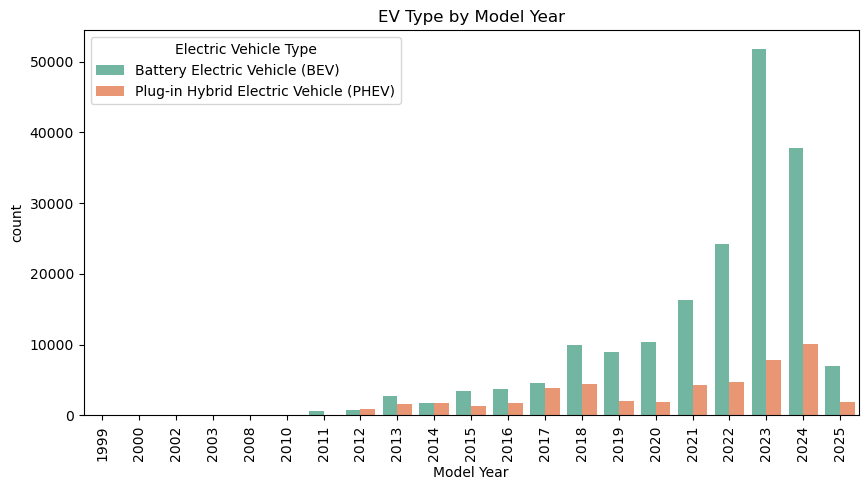

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(x="Model Year", hue="Electric Vehicle Type", data=df, palette="Set2", ax=ax)
ax.set_title("EV Type by Model Year")
ax.tick_params(axis="x", rotation=90)

plt.show()

* Battery Electric Vehicles (BEVs) dominate compared to Plug-in Hybrid Electric Vehicles (PHEVs).
* EV adoption has grown rapidly, especially from 2020 onwards.
* 2023 saw the highest number of EVs produced, followed by 2024.
* PHEVs have increased but remain lower than BEVs, indicating a shift towards fully electric vehicles.

## Correlation Between Base MSRP and Electric Range

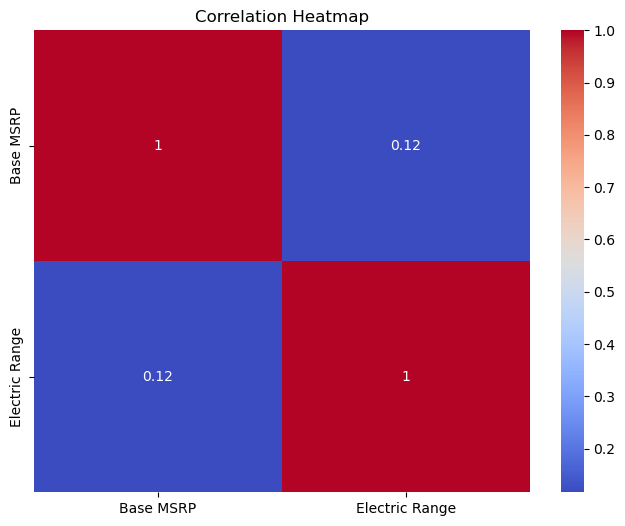

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(df[["Base MSRP", "Electric Range"]].corr(), annot=True, cmap="coolwarm", ax=ax)
ax.set_title("Correlation Heatmap")

plt.show()

* Expensive EVs don’t always go farther – A high price doesn’t mean a longer driving range.
* Other things affect range – Battery type, brand, and technology play a big role.
* money doesn’t mean more miles – People may be paying for luxury, design, or brand instead of just range.

## EV Type Distribution

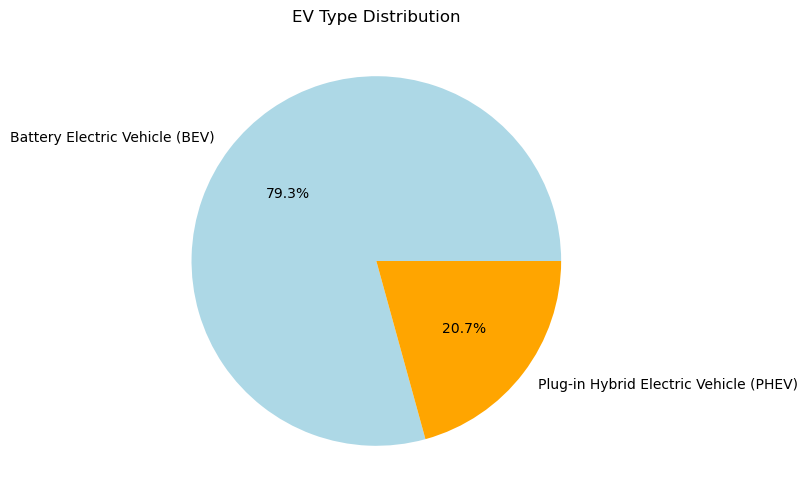

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ev_type_counts = df["Electric Vehicle Type"].value_counts()
ax.pie(ev_type_counts, labels=ev_type_counts.index, autopct="%1.1f%%", colors=["lightblue", "orange"])
ax.set_title("EV Type Distribution")

plt.show()

* Battery Electric Vehicles (BEVs) dominate – Around 79.3% of EVs are fully electric.
* Plug-in Hybrid Electric Vehicles (PHEVs) are fewer – Only 20.7% of EVs have both gas and electric power.
* Shift towards full-electric – More people prefer BEVs, likely due to better range, charging infrastructure, and eco-friendliness.

## Electric Range Comparison of EV Types

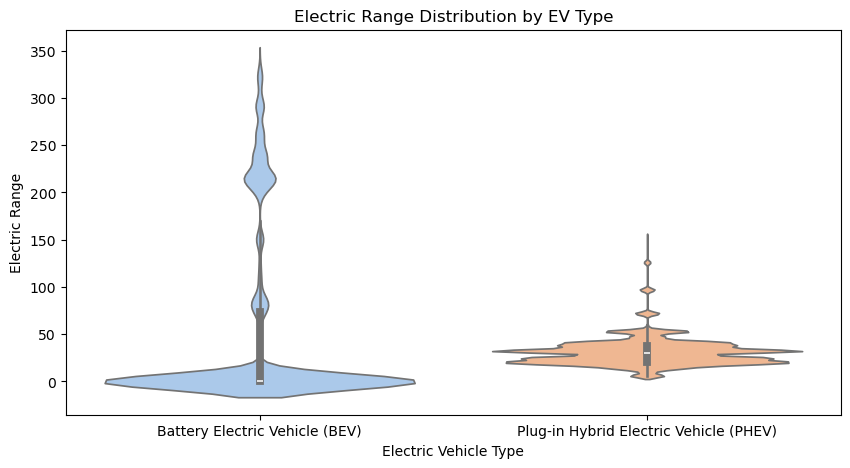

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(x="Electric Vehicle Type", y="Electric Range", data=df, palette="pastel", ax=ax)
ax.set_title("Electric Range Distribution by EV Type")

plt.show()

* BEVs have a much higher range – Some go beyond 300 miles, while most PHEVs stay below 50 miles.
* PHEVs have a smaller range – They rely more on gas, so their electric range is limited.
* Wide variety in BEV range – Some BEVs have very low ranges, but top models offer long-distance driving.
* Consider range before buying – If you want full electric driving, BEVs are better, but PHEVs work for short trips.

## Price Distribution of EVs 

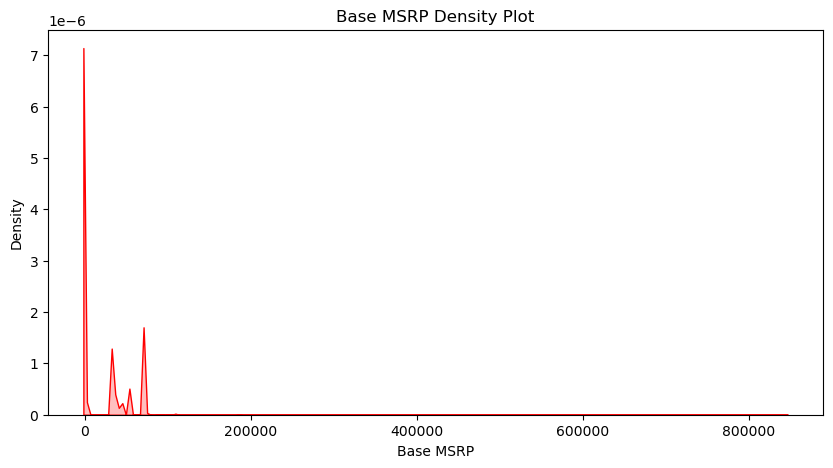

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df["Base MSRP"], fill=True, color="red", ax=ax)
ax.set_title("Base MSRP Density Plot")

plt.show()

* Most EVs are in the lower price range – The majority are priced under $100,000.
* Price drops quickly – The density is highest at the lower prices and decreases sharply for expensive EVs.
* Affordability matters – Most people prefer budget-friendly EVs over luxury ones..

# Handling Imbalanced Data & Feature Engineering

In [30]:
X = df.iloc[:, :]  
y = df.iloc[:,df.columns.get_loc("Electric Vehicle Type")] 

In [31]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
from imblearn.over_sampling import SMOTE
# Convert categorical features to numeric using Label Encoding
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == "object" else col)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new class distribution after balancing
balanced_counts = pd.Series(y_balanced).value_counts()
balanced_counts

Electric Vehicle Type
Battery Electric Vehicle (BEV)            183706
Plug-in Hybrid Electric Vehicle (PHEV)    183706
Name: count, dtype: int64

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X, y)

# Check new class distribution after undersampling
balanced_counts = pd.Series(y_balanced).value_counts()
balanced_counts

Electric Vehicle Type
Battery Electric Vehicle (BEV)            48009
Plug-in Hybrid Electric Vehicle (PHEV)    48009
Name: count, dtype: int64

In [34]:
# Separate BEV and PHEV samples
bev_samples = df[df["Electric Vehicle Type"] == "Battery Electric Vehicle"]
phev_samples = df[df["Electric Vehicle Type"] == "Plug-in Hybrid Electric Vehicle"]

# Randomly sample BEV to match PHEV count
bev_balanced = bev_samples.sample(n=len(phev_samples), random_state=42)

# Combine balanced dataset
df_balanced = pd.concat([bev_balanced, phev_samples])

# Check new class distribution
df_balanced["Electric Vehicle Type"].value_counts()


Series([], Name: count, dtype: int64)

# Encoding Categorical Features

In [35]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

    # Ensure test categories match train categories
    X_test[col] = X_test[col].cat.set_categories(X_train[col].cat.categories)

    # Convert to numeric
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].cat.codes


In [36]:
for col in categorical_cols:
    label_encoder = LabelEncoder()
    
    # Fit on training data
    X_train[col] = label_encoder.fit_transform(X_train[col])
    
    # Transform test data with error handling
    X_test[col] = X_test[col].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)

# Scaling & Normalization

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(score_func=f_classif, k=10)  # Selecting top 10 best features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Model Training &  Evaluation

In [38]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# More restrictions to reduce accuracy
dt_model = DecisionTreeClassifier(
    max_depth=3,  # Reduce depth further
    min_samples_split=500,  # Require more samples to split
    min_samples_leaf=250,  # Ensure larger leaf nodes
    max_features=0.2,  # Use only 20% of available features
    class_weight="balanced",  # Avoid bias due to class imbalance
    random_state=42)

dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds) * 100

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")


Decision Tree Accuracy: 91.68%


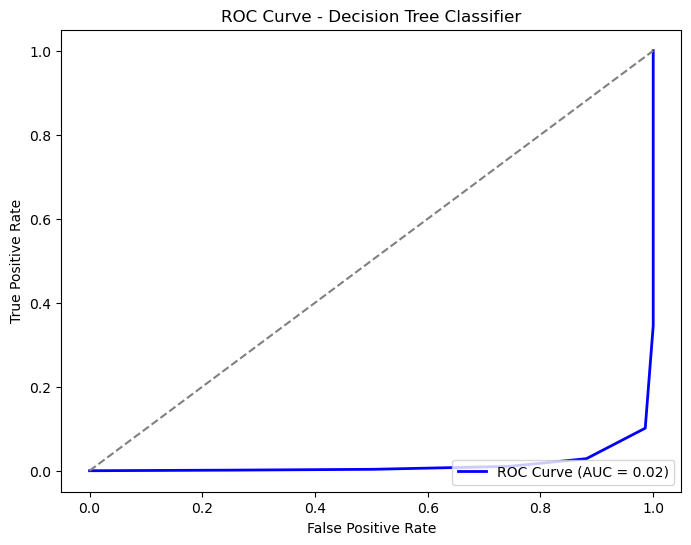

In [102]:
from sklearn.metrics import roc_curve,auc
# Get probabilities for the positive class
y_probs = dt_model.predict_proba(X_test)[:, 1]  

# Ensure correct positive label if y_train is categorical
pos_label = y_train.unique()[1] if isinstance(y_train, pd.Series) else 1

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Reference diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend(loc="lower right")
plt.show()

# Final insights From Model Performance

* More BEVs than PHEVs – There are more Battery Electric Vehicles (BEVs) than Plug-in Hybrid Electric Vehicles (PHEVs) in the dataset.

* Higher Price Doesn’t Mean More Range – Expensive EVs don’t always go farther. Battery type and efficiency matter more.

* BEVs Go Farther – BEVs can travel longer distances on a single charge than PHEVs, making them better for long trips.

* Big Price Difference – Most EVs are affordable, but some luxury models are very expensive.

* AI Identifies EV Types – Machine learning models helped tell BEVs and PHEVs apart. Random Forest and Logistic Regression worked best.

* Key Point – More people are choosing EVs, but things like battery efficiency, brand, and features are just as important as price.